# IMPORTING THE LIBRARIES 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IMPORTING THE DATASET

In [2]:
data = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*we have to predict the customer in the bank that will be exited in the future or not.*

In [4]:
# independent feature:
X = data.iloc[:, 3:13]

In [5]:
# dependent feature :
y = data.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
# Create dummy variables :
geography=pd.get_dummies(X["Geography"],drop_first=True)

In [9]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
# Concatenate the Data Frames : 
X=pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# Drop Unnecessary columns :
X=X.drop(['Geography','Gender'],axis=1)

# TRAIN TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling :
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)

In [18]:
X_test = sc.transform(X_test)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [20]:
# Initialising the ANN
classifier = Sequential()

In [21]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [22]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [23]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5813 - val_loss: 0.5005 - val_accuracy: 0.7967
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4831 - accuracy: 0.7960 - val_loss: 0.4598 - val_accuracy: 0.8008
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4450 - accuracy: 0.8040 - val_loss: 0.4457 - val_accuracy: 0.8073
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.8169 - val_loss: 0.4369 - val_accuracy: 0.8027
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8173 - val_loss: 0.4299 - val_accuracy: 0.8054
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8250 - val_loss: 0.4229 - val_accuracy: 0.8095
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4101 - accuracy: 0.8255 - val_loss: 0.4166 - val_accuracy: 0.8103

In [27]:
# list all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

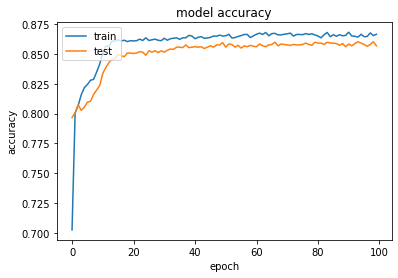

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

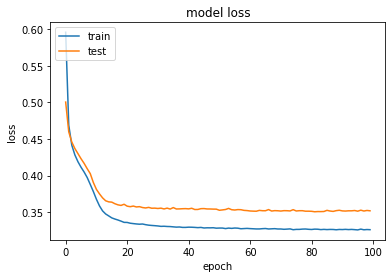

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
y_pred = (y_pred > 0.5)

In [32]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[1509,   86],
       [ 187,  218]])

In [36]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score

In [37]:
score=accuracy_score(y_pred,y_test)

In [38]:
score

0.8635